<a href="https://colab.research.google.com/github/mausoleo/rede_neural_convolucinal/blob/main/rede_neural_convolucional_definitivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

In [ ]:
# Função para carregar imagens e máscaras
def load_images_and_masks(image_dir, mask_dir):
    images = []
    masks = []
    for filename in os.listdir(image_dir):
        if filename.endswith(".png"):
            # Carrega a imagem
            img_path = os.path.join(image_dir, filename)
            image = load_img(img_path, target_size=(256, 256))  # Redimensione conforme necessário
            image = img_to_array(image) / 255.0  # Normaliza a imagem
            images.append(image)

            # Carrega a máscara
            mask_path = os.path.join(mask_dir, filename)
            mask = load_img(mask_path, target_size=(256, 256), color_mode='grayscale')
            mask = img_to_array(mask) / 255.0  # Normaliza a máscara
            masks.append(mask)

    return np.array(images), np.array(masks)

In [ ]:
# Carrega os dados
image_dir = '/content/cidades'
mask_dir = '/content/mascaras'
images, masks = load_images_and_masks(image_dir, mask_dir)

In [ ]:
# Dividir em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(images, masks, test_size=0.2, random_state=42)

In [ ]:
# Construção do modelo U-Net
def unet_model(input_size=(256, 256, 3)):
    inputs = layers.Input(input_size)

    # Encoder
    c1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)

    # Bottleneck
    c4 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c4)

    # Decoder
    u5 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c4)
    u5 = layers.concatenate([u5, c3])
    c5 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u5)
    c5 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c5)

    u6 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = layers.concatenate([u6, c2])
    c6 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c6)

    u7 = layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = layers.concatenate([u7, c1])
    c7 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c7)

    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(c7)

    model = models.Model(inputs=[inputs], outputs=[outputs])
    return model

In [ ]:
# Inicializa o modelo
model = unet_model()

In [ ]:
# Compila o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Treinamento do modelo
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=8)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 157s 15s/step - accuracy: 0.3839 - loss: 0.6836 - val_accuracy: 0.4455 - val_loss: 0.6378
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 142s 14s/step - accuracy: 0.4211 - loss: 0.6580 - val_accuracy: 0.4455 - val_loss: 0.6160
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 203s 14s/step - accuracy: 0.3986 - loss: 0.6433 - val_accuracy: 0.4455 - val_loss: 0.5713
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 210s 15s/step - accuracy: 0.3910 - loss: 0.5981 - val_accuracy: 0.4455 - val_loss: 0.5138
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 192s 14s/step - accuracy: 0.4227 - loss: 0.5266 - val_accuracy: 0.4510 - val_loss: 0.4828
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 145s 14s/step - accuracy: 0.4228 - loss: 0.5408 - val_accuracy: 0.4563 - val_loss: 0.4789
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 199s 14s/step - accuracy: 0.4197 - loss: 0.5214 - val_accuracy: 0.4557 - val_loss: 0.4791
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 157s 16s/step - accuracy: 0.4479 - loss: 0.5038 - val_accuracy: 0.

In [ ]:
# Avaliação do modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Perda: {loss:.4f}, Acurácia: {accuracy:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.4799 - loss: 0.3387
Loss: 0.3387, Accuracy: 0.4799


In [ ]:
# Função para aplicar o modelo em uma nova imagem
def predict_image(model, image_path):
    # Carrega e pré-processa a imagem
    image = load_img(image_path, target_size=(256, 256))
    image = img_to_array(image) / 255.0
    image = np.expand_dims(image, axis=0)  # Adiciona dimensão de batch

    # Faz a predição
    prediction = model.predict(image)
    prediction = np.squeeze(prediction)  # Remove a dimensão extra
    return prediction

In [ ]:
# Aplicando o modelo em uma nova imagem
new_image_path = '/content/Captura de tela 2024-11-05 172447.png'
predicted_mask = predict_image(model, new_image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 757ms/step


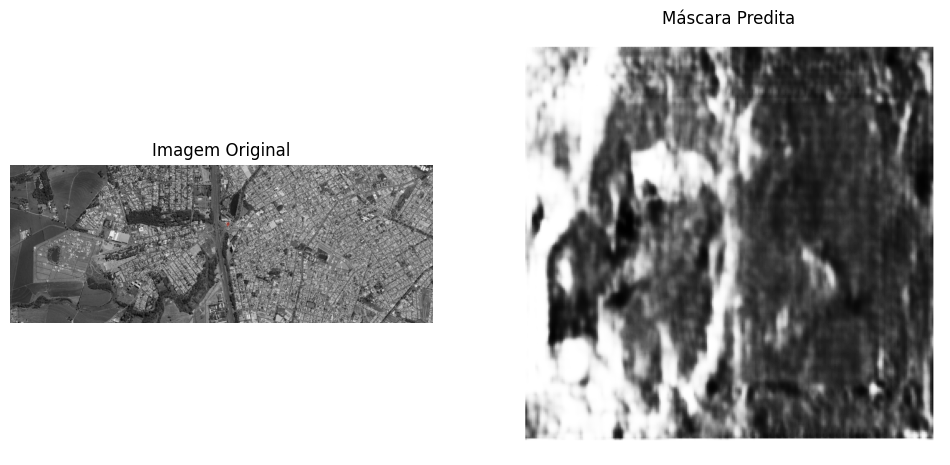

In [ ]:
# Exibindo a imagem original e a máscara predita
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Imagem Original")
plt.imshow(load_img(new_image_path))
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Máscara Predita")
plt.imshow(predicted_mask, cmap='gray')
plt.axis("off")

plt.show()